In [1]:
import matplotlib.pyplot as plt 
import scipy.misc
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation, GlobalAveragePooling2D
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print kv
print sv
print mv
print nv

Using TensorFlow backend.


2.0.5
0.19.1
2.0.0
1.13.0


In [2]:
# Local files
import utils
reload(utils)
import utils2
reload(utils2)

<module 'utils2' from 'utils2.pyc'>

# Data

### Config

In [3]:
trained_model_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/trained_models/4.1-as-FCN/'

In [4]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/train/50x50/'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50/'

In [5]:
input_shape = (50, 50, 1)
num_classes = 3

### Convert tif2png

Done in 1.0-mph_as_kd-baseline-simple_CNN_from_scratch.ipynb

### Create Generators

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

Found 1996 images belonging to 3 classes.
Found 499 images belonging to 3 classes.


# Experiments

## Baseline FCN (using https://github.com/asmith26/courses/blob/master/deeplearning1/nbs/lesson7.ipynb)

In [8]:
p = 0

classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D()(x)   # REMOVED MAX POOLING FOR VISUALISATION
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# # Following based on https://github.com/asmith26/courses/blob/master/deeplearning1/nbs/lesson7.ipynb
x = BatchNormalization(axis=-1)(x)
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
#x = MaxPooling2D()(x)   # REMOVED MAX POOLING FOR VISUALISATION
x = Conv2D(64,(3,3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
#x = MaxPooling2D()(x)   # REMOVED MAX POOLING FOR VISUALISATION
x = Conv2D(3,(3,3), padding='same')(x)
x = Dropout(p)(x)
x = GlobalAveragePooling2D()(x)
x = Activation('softmax')(x)


model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        36928     
__________

In [12]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/10
100/100 [==============================] - 54s - loss: 0.5436 - acc: 0.8129 - val_loss: 1.0027 - val_acc: 0.5686
Epoch 2/10
100/100 [==============================] - 54s - loss: 0.4308 - acc: 0.8482 - val_loss: 0.6406 - val_acc: 0.7730
Epoch 3/10
100/100 [==============================] - 55s - loss: 0.3990 - acc: 0.8507 - val_loss: 2.2859 - val_acc: 0.4441
Epoch 4/10
100/100 [==============================] - 54s - loss: 0.3610 - acc: 0.8711 - val_loss: 0.4305 - val_acc: 0.8581
Epoch 5/10
100/100 [==============================] - 54s - loss: 0.3714 - acc: 0.8753 - val_loss: 0.4110 - val_acc: 0.8464
Epoch 6/10
100/100 [==============================] - 54s - loss: 0.3605 - acc: 0.8657 - val_loss: 0.8446 - val_acc: 0.6839
Epoch 7/10
100/100 [==============================] - 54s - loss: 0.3199 - acc: 0.8879 - val_loss: 0.8033 - val_acc: 0.6845
Epoch 8/10
100/100 [==============================] - 54s - loss: 0.3072 - acc: 0.8896 - val_loss: 0.3291 - val_acc: 0.8815
Epoch 9/

In [13]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 108s - loss: 0.2464 - acc: 0.9158 - val_loss: 0.2320 - val_acc: 0.9181
Epoch 2/5
100/100 [==============================] - 107s - loss: 0.2570 - acc: 0.9099 - val_loss: 0.2556 - val_acc: 0.9065
Epoch 3/5
100/100 [==============================] - 105s - loss: 0.2627 - acc: 0.9079 - val_loss: 0.2208 - val_acc: 0.9316
Epoch 4/5
100/100 [==============================] - 107s - loss: 0.2421 - acc: 0.9114 - val_loss: 0.2381 - val_acc: 0.9282
Epoch 5/5
100/100 [==============================] - 106s - loss: 0.2431 - acc: 0.9109 - val_loss: 0.2344 - val_acc: 0.9182


In [14]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/3
100/100 [==============================] - 55s - loss: 0.2258 - acc: 0.9223 - val_loss: 0.2046 - val_acc: 0.9298
Epoch 2/3
100/100 [==============================] - 55s - loss: 0.2572 - acc: 0.9074 - val_loss: 0.2473 - val_acc: 0.9149
Epoch 3/3
100/100 [==============================] - 54s - loss: 0.2254 - acc: 0.9175 - val_loss: 0.2188 - val_acc: 0.9316


In [16]:
lr = 0.00001
K.set_value(model.optimizer.lr, lr)

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/3
100/100 [==============================] - 54s - loss: 0.2126 - acc: 0.9259 - val_loss: 0.2450 - val_acc: 0.9115
Epoch 2/3
100/100 [==============================] - 54s - loss: 0.2293 - acc: 0.9204 - val_loss: 0.2140 - val_acc: 0.9349
Epoch 3/3
100/100 [==============================] - 89s - loss: 0.2241 - acc: 0.9168 - val_loss: 0.2168 - val_acc: 0.9249


In [17]:
lr = 0.00001
K.set_value(model.optimizer.lr, lr)

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 108s - loss: 0.2213 - acc: 0.9184 - val_loss: 0.2348 - val_acc: 0.9132
Epoch 2/2
100/100 [==============================] - 108s - loss: 0.2274 - acc: 0.9203 - val_loss: 0.1990 - val_acc: 0.9365


### Visualise where FCN is looking

Load validation data to numpy arrays

In [18]:
valid_crops = []
valid_labels = []
valid_filenames = []

crops, labels, filenames = utils2.dir2list_of_numpy(valid_dir+"/oil_and_gas_infrastructure/",
                                             [1,0,0])
valid_crops.extend(crops)
valid_labels.extend(labels)
valid_filenames.extend(filenames)

crops, labels, filenames = utils2.dir2list_of_numpy(valid_dir+"/other/",
                                             [0,1,0])
valid_crops.extend(crops)
valid_labels.extend(labels)
valid_filenames.extend(filenames)

crops, labels, filenames = utils2.dir2list_of_numpy(valid_dir+"/turbine/",
                                             [0,0,1])
valid_crops.extend(crops)
valid_labels.extend(labels)
valid_filenames.extend(filenames)

In [19]:
print "valid_crops:", len(valid_crops)
print "valid_labels:", len(valid_labels)
print "valid_filenames:", len(valid_filenames)

valid_crops: 499
valid_labels: 499
valid_filenames: 499


In [20]:
np_valid_filenames = np.array(valid_filenames)
np_valid_crops = np.array(valid_crops)
np_valid_labels = np.array(valid_labels)

np_valid_crops = np.expand_dims(np_valid_crops, axis=3)
np_valid_filenames = np.expand_dims(np_valid_filenames, axis=1)

In [21]:
print np_valid_filenames.shape
print np_valid_crops.shape
print np_valid_labels.shape

(499, 1)
(499, 50, 50, 1)
(499, 3)


Let's grab the first validation numpy array/image (which is oil_and_gas_infrastructure).

In [22]:
valid_idx = 10  # CONFIGURE ME

valid_img = np_valid_crops[valid_idx]
valid_label = np_valid_labels[valid_idx]
valid_filename = np_valid_filenames[valid_idx][0]
valid_label = ["oil_and_gas_infrastructure", "other", "turbine"][np.argmax(valid_label)]

print valid_label

oil_and_gas_infrastructure


In [23]:
inp = np.expand_dims(valid_img, 0)
np.round(model.predict(inp)[0], 2)

array([ 0.,  1.,  0.], dtype=float32)

Model predicts "other". Let's see what the image is:

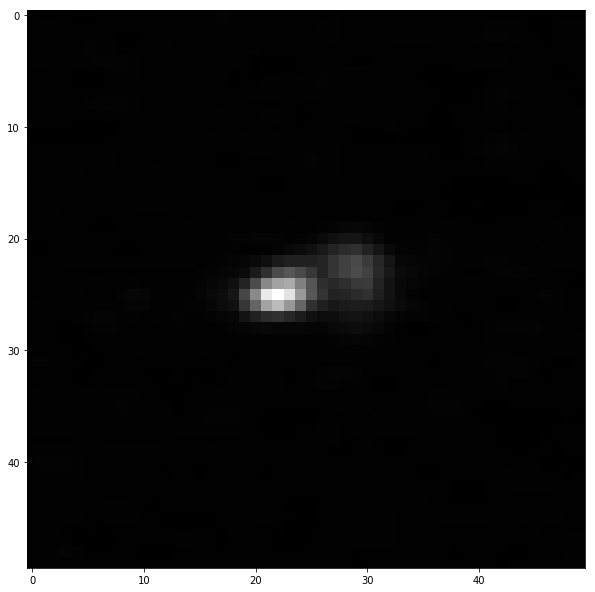

In [24]:
%matplotlib inline
plt.figure(figsize=(10,12))
plt.imshow(np.squeeze(valid_img), cmap='gray')

Now for the heatmap

In [25]:
# See https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer

l = model.layers
conv_fn = K.function([l[0].input, K.learning_phase()], [l[-4].output])
#conv_fn = K.function([l[0].input], [l[-4].output])

In [26]:
def get_cm(inp, label):
    conv = conv_fn([inp,0])[0][0,:,:,label]
    return scipy.misc.imresize(conv, (50,50), interp='nearest')

In [30]:
label_mappings = {"oil_and_gas_infrastructure": 0,
                 "other": 1,
                 "turbine": 2}

cm = get_cm(inp, 2)

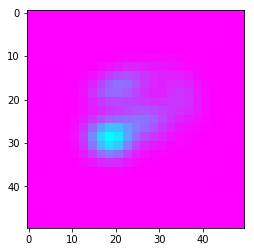

In [31]:
plt.imshow(cm, cmap="cool")

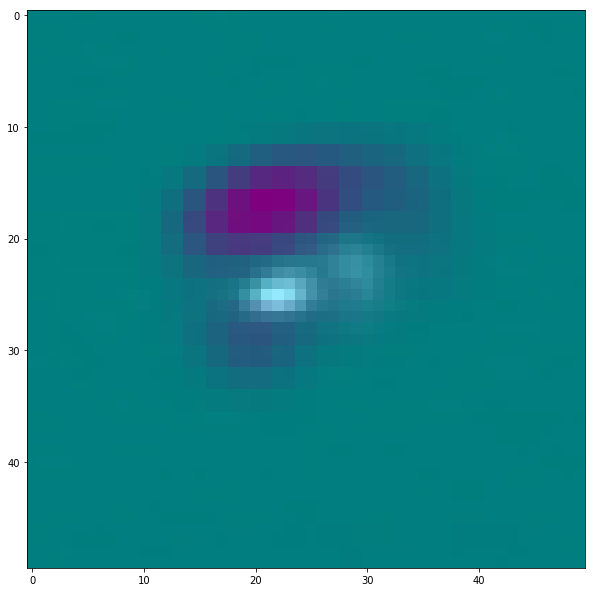

In [29]:
plt.figure(figsize=(10,12))
plt.imshow(np.squeeze(valid_img), cmap='gray')
plt.imshow(cm, cmap="cool", alpha=0.5)

Hmmm... removing the maxpooling layers reduces the accuracy.